https://www.kaggle.com/datasets/amar5693/student-performance-dataset

In [74]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-dataset/ultimate_student_productivity_dataset_5000.csv


In [75]:
df = pd.read_csv("/kaggle/input/student-performance-dataset/ultimate_student_productivity_dataset_5000.csv")
df.head()

,student_id,age,gender,academic_level,study_hours,self_study_hours,online_classes_hours,social_media_hours,gaming_hours,sleep_hours,...,exercise_minutes,caffeine_intake_mg,part_time_job,upcoming_deadline,internet_quality,mental_health_score,focus_index,burnout_level,productivity_score,exam_score
0,1,18,Other,High School,7.64,1.56,2.20,3.05,2.19,6.52,...,81,38,1,0,Good,10,43.05,31.77,73.65,50.16
1,2,18,Other,High School,2.21,2.22,2.10,1.65,2.55,5.97,...,111,339,0,0,Good,3,15.92,37.00,13.70,1.00
2,3,22,Male,High School,3.45,0.00,0.29,1.34,2.08,8.39,...,68,266,0,1,Good,8,27.39,34.37,45.15,18.30
3,4,17,Other,High School,5.75,2.08,3.01,2.27,2.20,6.31,...,113,480,1,1,Poor,3,22.31,77.31,20.92,9.37
4,5,19,Other,High School,6.83,1.72,3.33,2.65,0.70,8.01,...,121,24,1,0,Good,8,38.11,39.53,59.23,27.81


In [76]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   student_id            5000 non-null   int64  
 1   age                   5000 non-null   int64  
 2   gender                5000 non-null   object 
 3   academic_level        5000 non-null   object 
 4   study_hours           5000 non-null   float64
 5   self_study_hours      5000 non-null   float64
 6   online_classes_hours  5000 non-null   float64
 7   social_media_hours    5000 non-null   float64
 8   gaming_hours          5000 non-null   float64
 9   sleep_hours           5000 non-null   float64
 10  screen_time_hours     5000 non-null   float64
 11  exercise_minutes      5000 non-null   int64  
 12  caffeine_intake_mg    5000 non-null   int64  
 13  part_time_job         5000 non-null   int64  
 14  upcoming_deadline     5000 non-null   int64  
 15  internet_quality     

In [78]:
df.describe()

,student_id,age,study_hours,self_study_hours,online_classes_hours,social_media_hours,gaming_hours,sleep_hours,screen_time_hours,exercise_minutes,caffeine_intake_mg,part_time_job,upcoming_deadline,mental_health_score,focus_index,burnout_level,productivity_score,exam_score
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,20.520400,4.539594,2.478734,2.011984,2.998086,1.564514,7.016492,6.979588,74.535600,251.450400,0.498200,0.501400,5.507400,29.431616,45.615324,37.267716,18.803752
std,1443.520003,2.870406,1.821665,1.177990,0.983906,1.467949,1.110807,1.163692,2.486214,42.932293,143.842712,0.500047,0.500048,2.869145,9.962902,14.246591,16.849397,12.130840
min,1.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1250.750000,18.000000,3.250000,1.660000,1.320000,1.990000,0.670000,6.237500,5.280000,37.000000,129.000000,0.000000,0.000000,3.000000,22.567500,35.727500,25.290000,9.337500
50%,2500.500000,20.000000,4.530000,2.480000,2.010000,2.980000,1.490000,7.010000,6.950000,75.000000,252.000000,0.000000,1.000000,5.000000,29.430000,45.690000,36.860000,18.010000
75%,3750.250000,23.000000,5.760000,3.290000,2.690000,4.030000,2.340000,7.810000,8.710000,112.000000,376.000000,1.000000,1.000000,8.000000,36.242500,55.352500,49.142500,27.400000
max,5000.000000,25.000000,11.840000,7.410000,6.000000,8.280000,5.640000,10.000000,15.300000,149.000000,499.000000,1.000000,1.000000,10.000000,63.480000,97.580000,98.020000,64.090000


In [79]:
df.select_dtypes(include='number').corr()

,student_id,age,study_hours,self_study_hours,online_classes_hours,social_media_hours,gaming_hours,sleep_hours,screen_time_hours,exercise_minutes,caffeine_intake_mg,part_time_job,upcoming_deadline,mental_health_score,focus_index,burnout_level,productivity_score,exam_score
student_id,1.000000,0.015223,-0.018550,-0.020115,-0.003989,0.019322,0.007484,-0.017050,-0.003596,-0.003271,0.031160,0.009575,0.015509,0.008754,-0.010968,0.030547,-0.023209,-0.029406
age,0.015223,1.000000,0.000511,0.004889,-0.001553,0.004207,0.013768,0.004719,0.001662,0.016355,0.000437,-0.015375,-0.004410,-0.023883,-0.018509,-0.013559,-0.013607,-0.009047
study_hours,-0.018550,0.000511,1.000000,-0.003942,0.011238,-0.000296,0.017475,-0.027995,-0.022899,-0.004847,-0.015362,-0.017781,-0.012726,-0.013122,0.448050,-0.000811,0.637981,0.513434
self_study_hours,-0.020115,0.004889,-0.003942,1.000000,-0.010100,-0.015582,0.000569,-0.007138,-0.016264,0.006304,0.007317,0.017677,0.001944,0.011482,0.237721,0.002670,0.057781,0.083602
online_classes_hours,-0.003989,-0.001553,0.011238,-0.010100,1.000000,-0.011796,-0.006788,-0.013043,-0.022199,0.025451,0.007213,-0.013239,0.001454,-0.006295,0.007709,-0.021204,0.003215,0.004975
social_media_hours,0.019322,0.004207,-0.000296,-0.015582,-0.011796,1.000000,0.010251,0.003535,-0.016412,0.013158,-0.025719,0.002861,-0.004026,-0.008081,-0.314478,-0.023076,-0.070052,-0.106116
gaming_hours,0.007484,0.013768,0.017475,0.000569,-0.006788,0.010251,1.000000,-0.022217,-0.005403,-0.000176,-0.000008,-0.015833,0.010175,-0.008616,-0.176751,0.010701,-0.029411,-0.054506
sleep_hours,-0.017050,0.004719,-0.027995,-0.007138,-0.013043,0.003535,-0.022217,1.000000,-0.009720,0.007624,-0.009663,0.006229,0.002717,0.002122,0.158236,-0.492935,0.149666,0.234710
screen_time_hours,-0.003596,0.001662,-0.022899,-0.016264,-0.022199,-0.016412,-0.005403,-0.009720,1.000000,0.010681,-0.026549,0.021273,-0.020137,0.015780,-0.008281,0.340652,-0.089953,-0.131940
exercise_minutes,-0.003271,0.016355,-0.004847,0.006304,0.025451,0.013158,-0.000176,0.007624,0.010681,1.000000,-0.030125,-0.005723,-0.004023,-0.009911,-0.016380,-0.157311,0.020441,0.040724


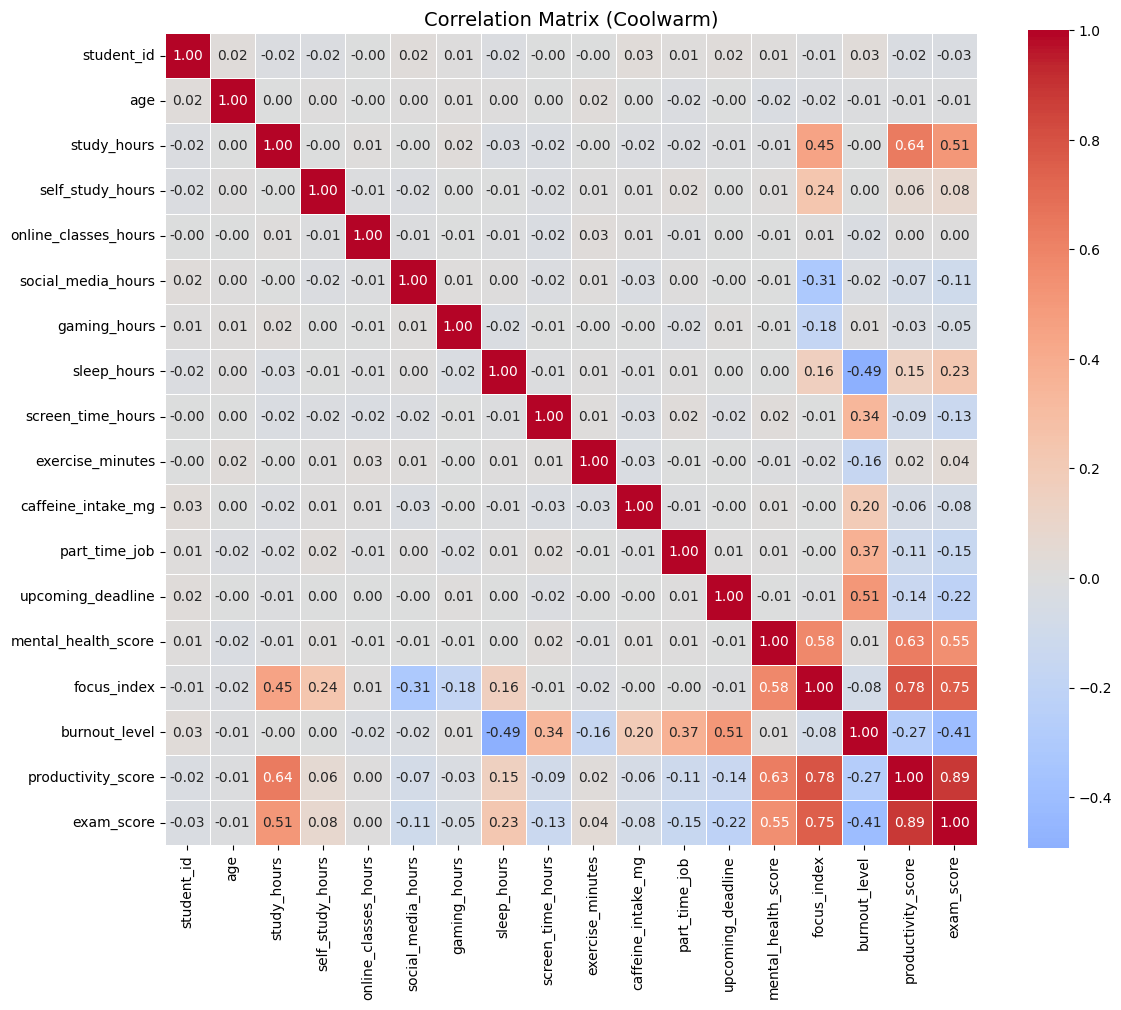

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.select_dtypes(include='number').corr()

# 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',        # 핵심: coolwarm 컬러맵
    annot=True,             # 상관계수 값 표시
    fmt=".2f",              # 소수점 둘째 자리까지
    linewidths=0.5,
    center=0,               # 0을 기준으로 색상 분기 (중요)
    square=True
)

plt.title("Correlation Matrix (Coolwarm)", fontsize=14)
plt.tight_layout()
plt.show()

In [81]:
corr_matrix['exam_score'].sort_values(ascending=False)

exam_score              1.000000
productivity_score      0.886401
focus_index             0.749879
mental_health_score     0.546547
study_hours             0.513434
sleep_hours             0.234710
self_study_hours        0.083602
exercise_minutes        0.040724
online_classes_hours    0.004975
age                    -0.009047
student_id             -0.029406
gaming_hours           -0.054506
caffeine_intake_mg     -0.075586
social_media_hours     -0.106116
screen_time_hours      -0.131940
part_time_job          -0.149807
upcoming_deadline      -0.215342
burnout_level          -0.407808
Name: exam_score, dtype: float64

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [83]:
target = "exam_score"

numeric_df = df.select_dtypes(include="number").copy()

X = numeric_df.drop(columns=[target])
y = numeric_df[target]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42 )

In [84]:
#check multi multicollinearity

X_vif = sm.add_constant(X_train)

vif_data=pd.DataFrame()
vif_data["feature"]=X_vif.columns
vif_data["VIF"]=[
    variance_inflation_factor(X_vif.values, i)
    for i in range(X_vif.shape[1])
]

print("checking VIF")

print(vif_data.sort_values("VIF", ascending=False))

checking VIF
                 feature         VIF
0                  const  236.563842
17    productivity_score   11.979326
16         burnout_level    6.206783
14   mental_health_score    5.275672
3            study_hours    5.222113
15           focus_index    4.706345
8            sleep_hours    2.478698
13     upcoming_deadline    2.477554
12         part_time_job    1.758291
9      screen_time_hours    1.675843
6     social_media_hours    1.384492
11    caffeine_intake_mg    1.224655
4       self_study_hours    1.201023
10      exercise_minutes    1.124653
7           gaming_hours    1.118513
1             student_id    1.005139
5   online_classes_hours    1.004348
2                    age    1.003045


In [85]:
# remove productivity score
X = X.drop(columns=["productivity_score", "focus_index", "student_id"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_vif = sm.add_constant(X_train)

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_vif.values, i)
    for i in range(X_vif.shape[1])
]

print(vif_data.sort_values("VIF", ascending=False))

                 feature         VIF
0                  const  234.095613
14         burnout_level    5.577399
12     upcoming_deadline    2.475080
7            sleep_hours    2.344400
11         part_time_job    1.751042
8      screen_time_hours    1.673731
10    caffeine_intake_mg    1.221569
9       exercise_minutes    1.124318
4   online_classes_hours    1.003612
2            study_hours    1.003348
1                    age    1.002616
3       self_study_hours    1.001759
6           gaming_hours    1.001706
5     social_media_hours    1.001620
13   mental_health_score    1.001048


In [86]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

r2_lr = r2_score(y_test, y_pred_lr)
print("\nLinear Regression")
print("R2:",r2_lr )
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

coef_df = pd.DataFrame({
    "feature": X.columns,
    "coefficient": lr.coef_
}).sort_values("coefficient", key=abs, ascending=False)

print("\nRegression")
print(coef_df)



Linear Regression
R2: 0.7390337685725119
RMSE: 5.96315866813572

Regression
                 feature  coefficient
12   mental_health_score     6.721809
1            study_hours     6.364324
13         burnout_level    -4.368693
4     social_media_hours    -1.290862
2       self_study_hours     0.943442
6            sleep_hours     0.882646
5           gaming_hours    -0.642964
11     upcoming_deadline    -0.258176
10         part_time_job    -0.215998
8       exercise_minutes    -0.114452
9     caffeine_intake_mg    -0.111975
7      screen_time_hours    -0.076144
0                    age    -0.016929
3   online_classes_hours    -0.008491


In [87]:
#random forest regressor

rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


rt_rf = r2_score(y_test, y_pred_rf)
print("Random Forest")
print("R2: ",rt_rf)
print("RSME: ", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

rf_importance = pd.DataFrame({
    "feature": X.columns,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

print("\nRF Feature Importance")
print(rf_importance)


Random Forest
R2:  0.7116110235199317
RSME:  6.268642980436834

RF Feature Importance
                 feature  importance
1            study_hours    0.306742
12   mental_health_score    0.302623
13         burnout_level    0.196234
4     social_media_hours    0.030550
2       self_study_hours    0.025796
6            sleep_hours    0.025183
9     caffeine_intake_mg    0.019960
5           gaming_hours    0.019894
7      screen_time_hours    0.019596
3   online_classes_hours    0.019406
8       exercise_minutes    0.018283
0                    age    0.011353
10         part_time_job    0.002478
11     upcoming_deadline    0.001904


In [88]:
print("Linear R2:", r2_lr)
print("RF R2:", rt_rf)

Linear R2: 0.7390337685725119
RF R2: 0.7116110235199317


In [89]:
rf_importance.sort_values("importance", ascending=False)

,feature,importance
1,study_hours,0.306742
12,mental_health_score,0.302623
13,burnout_level,0.196234
4,social_media_hours,0.030550
2,self_study_hours,0.025796
6,sleep_hours,0.025183
9,caffeine_intake_mg,0.019960
5,gaming_hours,0.019894
7,screen_time_hours,0.019596
3,online_classes_hours,0.019406


In [90]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(
    rf, X_test, y_test,
    n_repeats=30,
    random_state=42
)

perm_df = pd.DataFrame({
    "feature": X.columns,
    "importance": perm.importances_mean
}).sort_values("importance", ascending=False)

print(perm_df)

                 feature  importance
12   mental_health_score    0.646226
1            study_hours    0.558641
13         burnout_level    0.305816
4     social_media_hours    0.016795
2       self_study_hours    0.007921
6            sleep_hours    0.004855
5           gaming_hours    0.002049
11     upcoming_deadline    0.000384
7      screen_time_hours    0.000338
9     caffeine_intake_mg    0.000334
10         part_time_job    0.000114
8       exercise_minutes   -0.000029
3   online_classes_hours   -0.000339
0                    age   -0.001102
